# Generic Example Test for Differential Evolution Based Symbolic Regression (DESR) for Equation: y = sin(X) + 2 + e #

## Import Relevant Packages ##

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sys;sys.path.append("../")
from desr import Generator, Equation, TrainingData, \
                 Optimizer, LaplaceApproximation, DifferentialEvolution

## Initialize Data (This can be done using either numpy/torch for data) ##

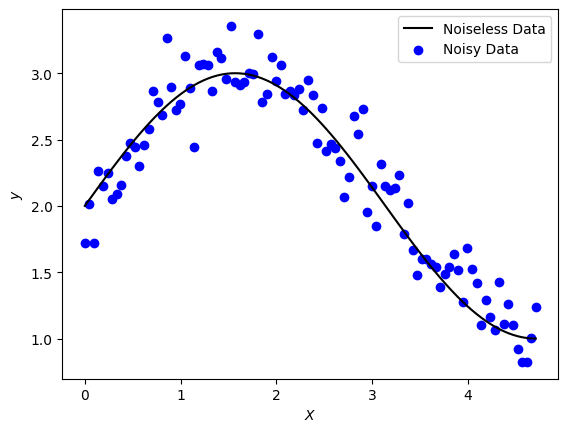

In [14]:
std_dev = 0.2
X = np.linspace(0, 3*np.pi/2, 100)
y = np.sin(X) + 2.0 
y_noisy = y + np.random.normal(loc=0, scale=std_dev, size=X.shape)
training_data = TrainingData(x=X, y=y_noisy)

plt.plot(X, y, label="Noiseless Data", color="k")
plt.scatter(X, y_noisy, label="Noisy Data", color="b")
plt.xlabel(r"$X$")
plt.ylabel(r"$y$")
plt.legend()


## Initialize Optimizer (Used for deterministic optimization), Generator and Operators ##

In [15]:

optimizer = Optimizer(training_data)
generator = Generator(genotype_size=16, X_dim=training_data.x.shape[1])
operators = ["add", "sub", "mult", "log", "sin"]
generator.add_operators(operators)


## Initialize Bayesian Fitness (Laplace Approximation for Marginal Likelihood) and Differential Evolution Instance

In [16]:
laplace_approximation = LaplaceApproximation(optimizer)
differential_evolution = DifferentialEvolution(chains=20, generator=generator,
                            bayesian_fitness=laplace_approximation)


/Users/nolanstrauss/codes/DESR/examples/../desr/bayesian_fitness/laplace_approximation.py:38: RuntimeWarning: divide by zero encountered in log
  np.log(norm(loc=0, scale=std).pdf(R.detach().numpy()))


## Generate Samples Using Differential Evolution ##

In [17]:
differential_evolution.sample(iterations=100, return_states=False)

  0%|          | 0/100 [00:00<?, ?it/s]/Users/nolanstrauss/codes/DESR/examples/../desr/differential_evolution.py:62: RuntimeWarning: overflow encountered in exp
  ratio = np.exp(-proposed_state.fitness+current_state.fitness)
  2%|▏         | 2/100 [00:00<00:30,  3.16it/s]/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_optimize.py:863: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
100%|██████████| 100/100 [00:15<00:00,  6.30it/s]


## Print All Unique Accepted States and Fitness (From high to low, note: fitness=inf may occur due to nan comparisons in initial stages) ##

In [18]:
for i, state in enumerate(differential_evolution.unique_accepted_states):
    print(f"Model_{i} Expression: {str(state)}")
    print(f"Model_{i} Fitness: {str(state.fitness)}\n")

Model_0 Expression: log((X_0 * sin(sin(log(C_0)))))
Model_0 Fitness: nan

Model_1 Expression: ((X_0)^(3) * ((-1 * sin(X_0)) + (((X_0 * X_0) * X_0) * X_0)))
Model_1 Fitness: inf

Model_2 Expression: (X_0 + X_0)
Model_2 Fitness: 1661.2288540661057

Model_3 Expression: ((sin(X_0) + X_0) + X_0)
Model_3 Fitness: 1445.6889183496771

Model_4 Expression: (C_0 * (X_0 + (-1 * X_0)))
Model_4 Fitness: 577.2366104021652

Model_5 Expression: (((C_0 + X_0) + (C_1 * -1)))^(2)
Model_5 Fitness: 501.9067772312879

Model_6 Expression: sin(X_0)
Model_6 Fitness: 451.7419277054549

Model_7 Expression: (((((C_0 * C_0) + (-1 * (sin(sin(C_0)) + (C_0 * C_0)))) + (-1 * sin(C_0))) + sin(sin(C_0))) * log(sin(sin(C_0))))
Model_7 Fitness: 428.1867436177692

Model_8 Expression: X_0
Model_8 Fitness: 402.5667841303849

Model_9 Expression: ((log((C_0 * C_0)) * X_0) * log((C_0 * C_0)))
Model_9 Fitness: 300.48096985245564

Model_10 Expression: ((C_0 + X_0) * ((-1 * log(C_0)) + sin(log(C_0))))
Model_10 Fitness: 283.14187098

## Print Unique Final Accepted States and Fitness (From high to low) ##

In [19]:
for i, state in enumerate(differential_evolution.unique_states):
    print(f"Model_{i} Expression: {str(state)}")
    print(f"Model_{i} Fitness: {str(state.fitness)}\n")

Model_0 Expression: (sin(sin(X_0)) - -2.036)
Model_0 Fitness: 53.65629396983892

Model_1 Expression: (sin(X_0) - -2.012)
Model_1 Fitness: 53.124510879828975



## Plot Unique Final Accepted States ##

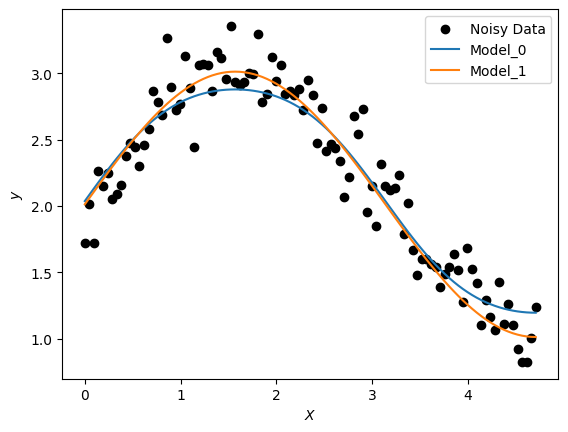

In [20]:
fig, axs = plt.subplots()
axs.scatter(training_data.x.detach().numpy(), training_data.y.detach().numpy(), label="Noisy Data", color="k")

for i, state in enumerate(differential_evolution.unique_states):
    axs.plot(training_data.x.detach().numpy().squeeze(), state.evaluate_equation(training_data.x).detach().numpy().squeeze(), label=f"Model_{i}")
axs.set_xlabel(r"$X$")
axs.set_ylabel(r"$y$")
axs.legend()